# Import useful libraries

In [2]:
library(ggplot2)
library(gridExtra)
library(latex2exp)

# Ex 1 - Contaminant concentartion

In [18]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

E1 <- sum(x*p1)
E2 <- sum(x*p2)

var1 <- sum((x-E1)^2*p1)
var2 <- sum((x-E2)^2*p2)

cat("Method 1 E[x] and Var[x]: ", E1, '\t', var1, '\n')
cat("Method 2 E[x] and Var[x]: ", E2, '\t', var2)

Method 1 E[x] and Var[x]:  15.959 	 0.033979 
Method 2 E[x] and Var[x]:  15.9622 	 0.02816716

# Ex2 - Doctor's waiting time
## a)

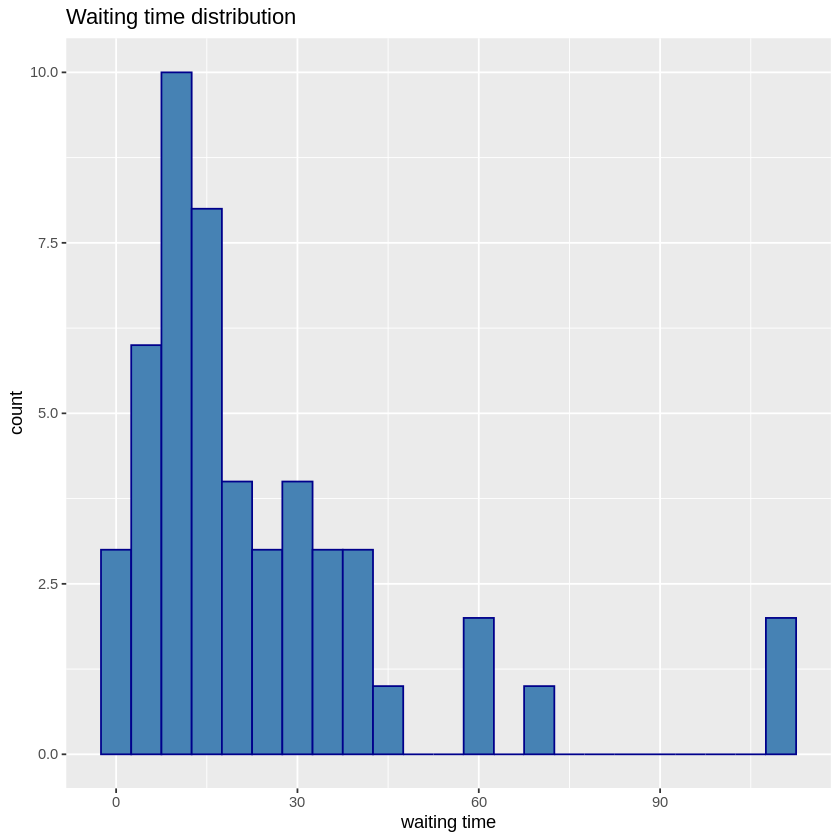

In [1]:
library(ggplot2)
lambda = 1/30
x <- rexp(50, lambda)

p <- ggplot() + 
aes(x=x) + 
geom_histogram(color='darkblue', fill='steelblue', binwidth=5) + labs(title='Waiting time distribution', x='waiting time')
p

## b)

In [22]:
p_less10 <- pexp(10, lambda)
cat("Prob. to wait less than 10 minutes:", p_less10, sep='\t')

Prob. to wait less than 10 minutes:	0.2834687

## c)

In [2]:
mean_exp <- mean(x)
mean_th  <- 1/lambda
mean_R   <- integrate(function(x, lambda) {x*dexp(x, lambda)}, 0, Inf, lambda)

cat("Experimental mean:", mean_exp, "\nTheor. mean:", mean_th, "\nR mean:", mean_R$value, sep='\t')

Experimental mean:	24.13319	
Theor. mean:	30	
R mean:	30

## d)

In [28]:
p_more1hr <- 1 - pexp(60, lambda)

cat("Prob. to wait more than 1 hour:", p_more1hr)

Prob. to wait more than 1 hour: 0.1353353

# Ex3 - Typo errors

Prob. of at least one error on specific page: 0.2834687

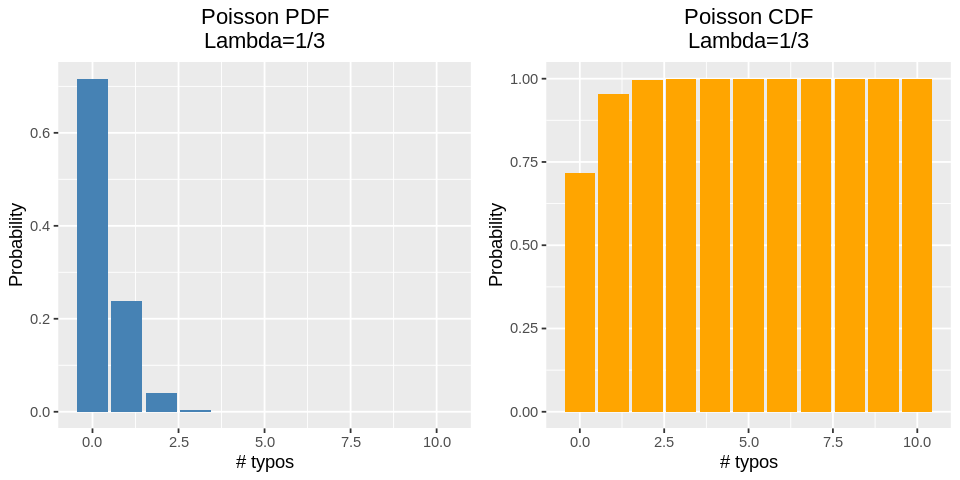

In [13]:
options(repr.plot.width=8, repr.plot.height=4)

lambda <- 1/3
x=seq(0, 10, 1)
df_p <- data.frame(x=x, y=dpois(x, lambda))
df_c <- data.frame(x=x, y=ppois(x, lambda))

# plot pdf and cdf
pdf <- ggplot(df_p, aes(x=x, y=y)) +
       geom_bar(stat='identity', fill='steelblue') +
       labs(title='Poisson PDF\nLambda=1/3', x='# typos', y='Probability') +
       theme(plot.title=element_text(hjust=0.5))
cdf <- ggplot(df_c, aes(x=x, y=y)) +
       geom_bar(stat='identity', fill='orange') +
       labs(title='Poisson CDF\nLambda=1/3', x='# typos', y='Probability') +
       theme(plot.title=element_text(hjust=0.5))

grid.arrange(pdf, cdf, ncol=2)

# probability of at least one error on a specific page
p <- 1-df_c[x==0, 2]
cat("Prob. of at least one error on specific page:", p)

# Ex4 - Draw cards

In [37]:
# we have 4 aces in one deck
p_ace <- 4/52
p     <- pgeom(9, p_ace, lower.tail=F)
p1    <- 0

cat("Prob. of at least 10 drawns to get one ace:\n\t- with geom:", p, "\n\t- with Pascal:", p1)

Prob. of at least 10 drawns to get one ace:
	- with geom: 0.4491371 
	- with Pascal: 0

In [38]:
1-sum(dnbinom(0, 9, p_ace))

[1] 1